In [22]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from mnist_classification.config import PROCESSED_DATA_DIR

In [23]:
# Load mnist dataset 
mnist = fetch_openml('mnist_784', as_frame=False)


In [24]:
# Get the features and its label 
X, y = mnist.data, mnist.target

In [25]:
# get information about data 
print("features shape", X.shape)
print("label shape", y.shape)

features shape (70000, 784)
label shape (70000,)


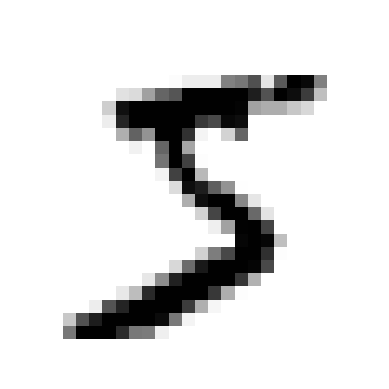

its lable 5


In [26]:
# plot one number image from data
def plot_digit(image_data): 
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis("off")

idx_dig = 0
some_digit = X[idx_dig]
plot_digit(some_digit)
plt.show() 

print("its lable", y[idx_dig])

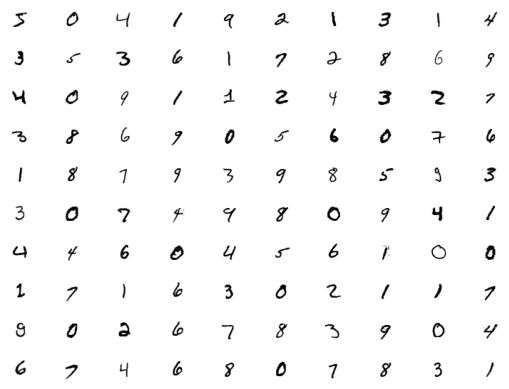

In [27]:
# Plot some digits 
for idx, image_data in enumerate(X[:100]):
    image_data[idx]
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=1, hspace=1)
plt.show()


In [28]:
pixel_columns = [f"pixel_{i}" for i in range(X.shape[1])]
X_df = pd.DataFrame(X, columns=pixel_columns)
y_df = pd.DataFrame(y, columns=['labels'])

In [29]:
X_df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
type(y_df)

pandas.core.frame.DataFrame

In [31]:
# split the data to train and test sets and save it as parquet file 
X_train, X_test, y_train, y_test= train_test_split(X_df, y_df, shuffle=True)
X_train.to_parquet(PROCESSED_DATA_DIR / 'x_train.parquet',index=False)
X_test.to_parquet(PROCESSED_DATA_DIR / 'x_test.parquet',index=False)
y_train.to_parquet(PROCESSED_DATA_DIR / 'y_train.parquet',index=False)
y_test.to_parquet(PROCESSED_DATA_DIR / 'y_test.parquet',index=False)